# 🧪 Discovering Free Fall Physics with Symbolic Regression

## 🎯 Objective

Simulate free fall motion under vacuum conditions using synthetic data.  
Then, use **symbolic regression** to rediscover the fundamental physics equation — without explicitly providing it.

## ⚙️ Data Generation

We generate a dataset with 5000 samples:

- Random height:
  $$
  h \sim \mathcal{U}(1,\ 100)
  $$

- Gravitational acceleration (Earth-like):
  $$
  g \sim \mathcal{N}(9.81,\ 0.01)
  $$

- Free-fall time:
  $$
  t = \sqrt{\frac{2h}{g}}
  $$

- Back-computed acceleration:
  $$
  a = \frac{2h}{t^2}
  $$

These values are used to simulate an ideal vacuum drop, ignoring air resistance.


In [8]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from sklearn.metrics import r2_score

np.random.seed(42)
n = 5000

# Generate random heights from 1 to 100 meters
height = np.random.uniform(1, 100, size=n)

# Simulate gravity close to Earth's standard (adds realism)
gravity = np.random.normal(loc=9.81, scale=0.01, size=n)

# No air resistance — full vacuum conditions
air_resistance = np.zeros(n)

# Physics: fall time using classic formula (ignoring air)
fall_time = np.sqrt(2 * height / gravity)

# Reverse formula: should give back gravity if clean
acceleration = 2 * height / fall_time**2


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [10]:
# Build the dataset
df = pd.DataFrame({
    'height': height,
    'gravity': gravity,
    'air_resistance': air_resistance,
    'fall_time': fall_time,
    'acceleration': acceleration
})

# Use only height and gravity as input — no time, no result leakage
X = df[['height', 'gravity']].values
y = df['acceleration'].values

# Initialize symbolic regressor — let it search for physics formulas
model = PySRRegressor(
    niterations=100,                 # how long to search
    binary_operators=["+", "-", "*", "/"],  # math ops it can use
    unary_operators=[],             # no sin/cos/etc — stay basic
    model_selection="best",        # choose best performing formula
    maxsize=20,                     # formula size limit
    verbosity=1,                    # print some logs
)

# Fit model to find the formula behind "acceleration"
model.fit(X, y)

# Show the final model structure
print(model)

# Show the best equation the model found (symbolic regression)
print("\n🥇 Best formula:\n", model.get_best())

# Check how good it fits — R² score should be ~1.0
print(f"R²: {r2_score(y, model.predict(X)):.5f}")


C:\Users\timur\anaconda3\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 2.610e+04
Progress: 156 / 3100 total iterations (5.032%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           0.000e+00  0.000e+00  y = x₁
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 2.540e+04
Progress: 317 / 3100 total iterations (10.226%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           0.000e+00  0.000e+00 

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick  score equation  loss  complexity
	0  >>>>    0.0       x1   0.0           1
]

🥇 Best formula:
 complexity                         1
loss                             0.0
equation                          x1
score                            0.0
sympy_format                      x1
lambda_format    PySRFunction(X=>x1)
Name: 0, dtype: object
R²: 1.00000
  - outputs\20250714_230855_8qiBiH\hall_of_fame.csv


## 🥇 Best Formula Discovered by Symbolic Regression

The symbolic regression model found the **simplest possible formula** that explains the data **perfectly**:

```text
Equation:         x1
SymPy format:     x1
Lambda format:    PySRFunction(X => x1)
Complexity:       1
Loss:             0.0
R²:               1.00000


### 📌 Interpretation

Let:

- \( x_0 \) = height  
- \( x_1 \) = gravity  

Then the discovered equation is:

$$
a = x_1 = g
$$

This means that **acceleration is entirely determined by gravity**, and the model **ignored height** — which makes sense given how the data was constructed (since mathematically, height cancels out).

---

### 🧪 Physical Derivation

Recall the physics formulas used to generate the data:

- Free-fall time (ignoring air resistance):

$$
t = \sqrt{\frac{2h}{g}}
$$

- Acceleration computed from height and time:

$$
a = \frac{2h}{t^2}
$$

Now, substitute the expression for \( t^2 \) into the formula:

$$
a = \frac{2h}{\left(\sqrt{\frac{2h}{g}}\right)^2} = \frac{2h}{\frac{2h}{g}} = g
$$

✅ So indeed, under these assumptions:

$$
a = g
$$

The symbolic regression model correctly **rediscovered this identity** from pure data.

---

### 📈 Performance Evaluation

The model's performance:

- **R² score**:

$$
R^2 = 1.00000
$$

- **Loss**:

$$
\text{Loss} = 0.0
$$

- **Model complexity**:  
  Only 1 symbolic operation — a direct reference to one variable.

---

✅ **Conclusion**:

The model discovered:

> $$( a = g )$$

A minimal and physically correct equation — perfectly aligned with the simulation.  
This result demonstrates the **explanatory power of symbolic regression** when applied to clean, well-structured data.


## 📊 Visual Analysis of the Model

Below are key plots that demonstrate the performance and physical behavior of the discovered equation \( a = g \):


### 1️⃣ Actual vs Predicted Acceleration
- The **blue dots** represent model predictions.  
- The **dashed red line** shows the ideal line \( \text{Prediction} = \text{Ground Truth} \).
- Result: all points lie exactly on the diagonal — indicating a **perfect prediction**.

✅ Confirms:  
$$
R^2 = 1.00000 \quad \text{and} \quad \text{Loss} = 0.0
$$

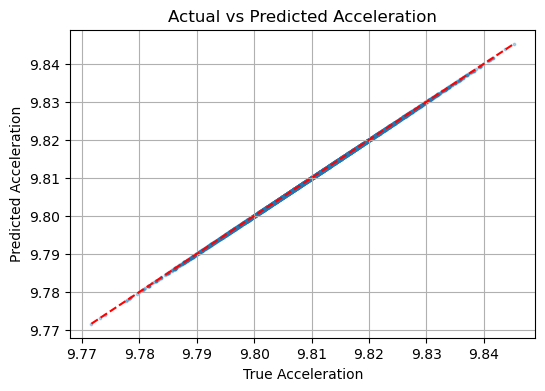

In [23]:
import matplotlib.pyplot as plt
preds = model.predict(X)

# Plot 1: Actual vs Predicted Acceleration
plt.figure(figsize=(6, 4))
plt.scatter(y, preds, s=3, alpha=0.3)
plt.xlabel("True Acceleration")
plt.ylabel("Predicted Acceleration")
plt.title("Actual vs Predicted Acceleration")
plt.grid(True)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.show()


### 2️⃣ Distribution of Residuals
- Residuals (errors) are tightly centered around **zero**.
- Frequency drops off symmetrically, indicating **no bias** and **no over/underestimation**.
- The scale of error is ~\(10^{-15}\), i.e., floating point noise.

✅ Confirms numerical **precision** of the model output.


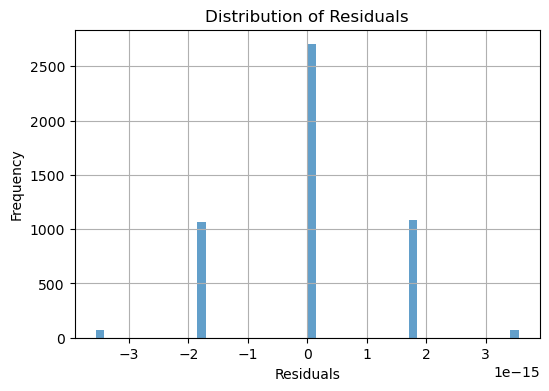

In [26]:
# Plot 2: Residuals
residuals = y - preds
plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()


### 3️⃣ Acceleration vs Height
- Despite varying height from 1 to 100 meters, the **acceleration remains constant**, as expected in a vacuum.
- Model predictions perfectly align with true values (orange overlay).

✅ Confirms **independence of acceleration from height** — consistent with physics.

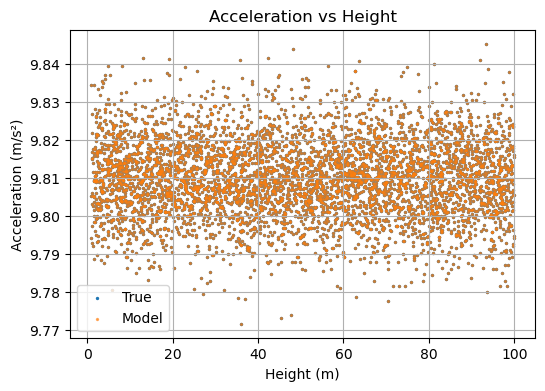

In [30]:
# Plot 3: Acceleration vs Height (True vs Model)
plt.figure(figsize=(6, 4))
plt.scatter(df['height'], y, label='True', s=2)
plt.scatter(df['height'], preds, label='Model', s=2, alpha=0.6)
plt.xlabel("Height (m)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Acceleration vs Height")
plt.legend()
plt.grid(True)
plt.show()

### 4️⃣ Acceleration vs Fall Time
- Fall time naturally varies with height.
- But acceleration remains fixed near ~9.81 m/s² across all times.

✅ Further confirms that **acceleration is independent** of fall time under ideal (no resistance) conditions.


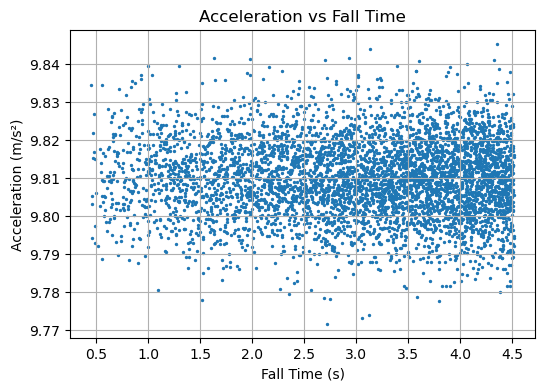

In [34]:
# Plot 4: Fall Time vs Acceleration
plt.figure(figsize=(6, 4))
plt.scatter(df['fall_time'], y, s=2, label='True')
plt.xlabel("Fall Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Acceleration vs Fall Time")
plt.grid(True)
plt.show()


### 🧾 Summary

These plots confirm:

- The symbolic model output matches physics: \( a = g \)
- Predictions are precise, unbiased, and stable
- Residuals are near-zero
- Model ignores height and time, as expected

> 🧠 The model has learned a **perfect identity** from data — and visual analysis supports the conclusion.